In [1]:
import numpy as np
from IPython.display import clear_output
import os
import matplotlib.pyplot as plt

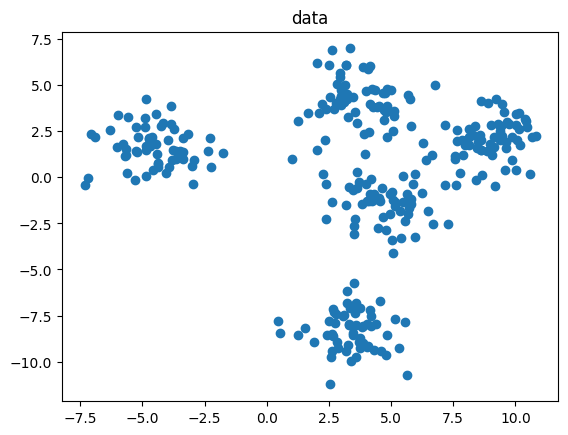

In [2]:
X = np.load("X.npy")

plt.figure()
plt.scatter(X[0,:],X[1,:])
plt.title("data")

plt.savefig("data.png")

In [3]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def distance2(x1, x2):
    return np.sum(np.abs(x1-x2))



def random_init(X, K):
    x_idxs = np.random.permutation(X.shape[1])
    return X[:, x_idxs[:K]]
def kmeans(X, K=8, max_iterations=100, distance_method=distance,init_method=random_init):
    if not os.path.exists("kmeans-k{}".format(K)):
        os.mkdir("kmeans-k{}".format(K))
    plt.figure()
    
    # step 1: init cluster centers
    
    u = init_method(X, K)
    
    # init all samples x into first cluster
    y = np.zeros((X.shape[1],))

    for iter_idx in range(1, max_iterations+1):
        # D_ik denotes the distance between x_i and u_k
        D = np.zeros((X.shape[1], K))
        
        for i in range(X.shape[1]):
            # step 2
            for k in range(K):
                # 计算样本点 x_i 到聚类中心 u_k 的距离
                D[i, k] = distance_method(X[:, i], u[:, k])
            # 将样本点 x_i 分配到最近的聚类中心
            y[i] = np.argmin(D[i])
            
        # step 3
        for k in range(K):
            # 计算属于聚类 c_k 的样本点的均值，作为新的聚类中心 u_k
            u[:, k] = np.mean(X[:, y == k], axis=1)
        
        # plot figures
        clear_output(wait=True)
        plt.scatter(X[0,:], X[1,:], c=y, s=8)
        plt.title("kmeans clustering at iter={}".format(iter_idx))
        
        # plot cluster centers
        plt.scatter(u[0,:], u[1,:], c=range(K), s=K, marker='o', linewidths=6)
        for k in range(K):
            plt.text(u[0,k], u[1,k], "u_{}".format(k),)
        
        plt.savefig("kmeans-k{}/iter={}.png".format(K, iter_idx))
        plt.show()
        
    return y


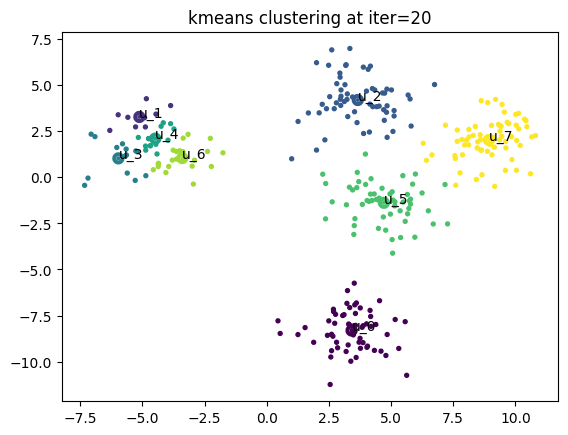

In [4]:
y = kmeans(X, K=8, max_iterations=20)

曼哈顿距离

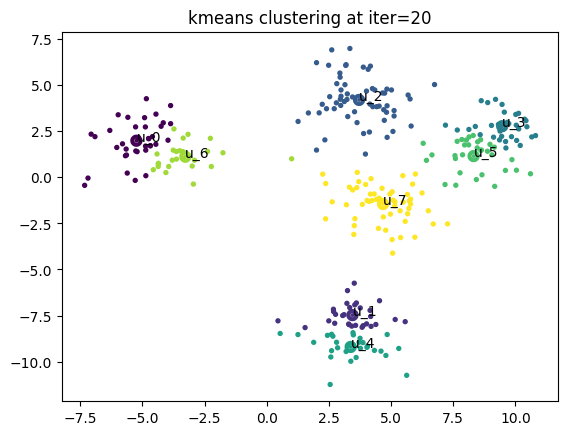

In [5]:
y = kmeans(X, K=8, max_iterations=20,distance_method=distance2)

k=5

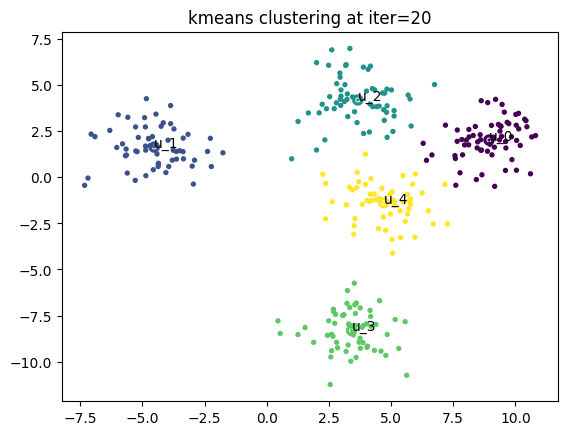

In [6]:
y = kmeans(X, K=5, max_iterations=20)

kmeans++ init

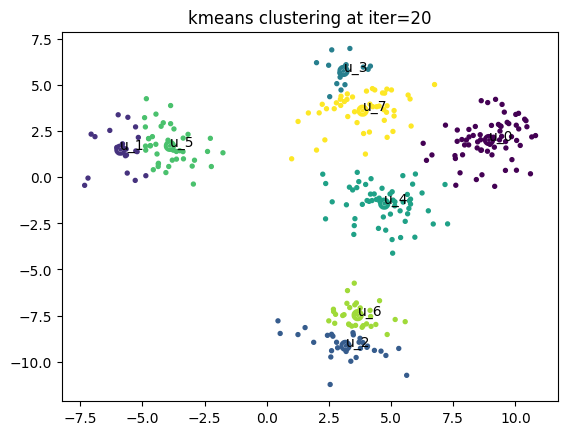

In [12]:
def kmeanspp_init(X, K):
    # 随机选择第一个聚类中心
    n_features,n_samples  = X.shape
    centers = np.zeros((n_features,K))
    centers[:,0] = X[:,np.random.randint(n_samples)]

    # 计算每个样本到最近聚类中心的距离
    distances = np.zeros(n_samples)
    for i in range(1, K):
        # 计算每个样本到最近聚类中心的距离的平方
        for j in range(n_samples):
            distances[j] = np.min([distance(X[:,j], centers[:,k])**2 for k in range(i)])
        # 选择距离最大的样本作为下一个聚类中心
        next = X[:,np.argmax(distances)]
        centers[:,i] = next
    print(centers.shape)
    return centers
y = kmeans(X, K=8, max_iterations=20,init_method=kmeanspp_init)